# IMDB COMMENTS CLASSİFİCATİON
- dataset link : https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## import libraries

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## load dataset

In [2]:
df=pd.read_csv("IMDB Dataset.csv")
print(df.head())
df.shape

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


(50000, 2)

## explore dataset

In [3]:
documents= df["review"][:]
labels= df["sentiment"][:]

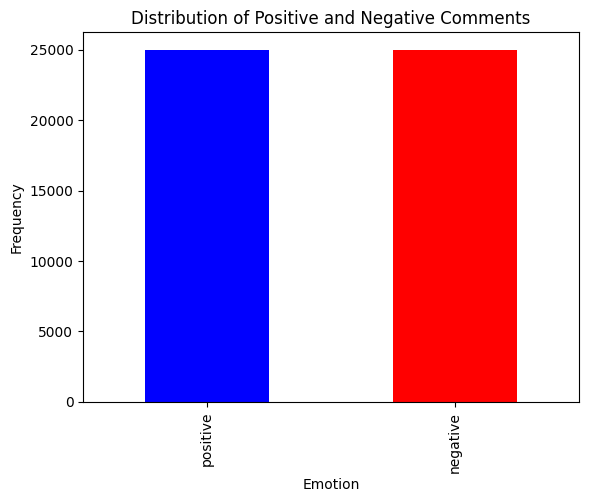

In [24]:
labels.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Distribution of Positive and Negative Comments")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.show()

## preprocessing

In [5]:
sp_eng=set(stopwords.words("english"))

In [6]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in sp_eng]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Harun\AppData\Local\Temp\ipykernel_37696\3967823321.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\Harun\AppData\Local\Temp\ipykernel_37696\3967823321.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\Harun\AppData\Local\Temp\ipykernel_37696\3967823321.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [ ]:
cleaned_documents=[clean(row) for row in documents]
print(documents.head())
cleaned_documents[:5]


0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object


['one review mention watch  oz episod youll hook right exact happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfo

In [8]:
print(len(cleaned_documents[0]))  ## ilk cumlede temizlenmiş kelime sayısı
print(len(documents[0])) ## ilk cumlede temizlenmemiş kelime sayısı

1044
1761


## text vectorization

In [9]:
vectorizer=CountVectorizer()

x=vectorizer.fit_transform(cleaned_documents)

In [ ]:
x.shape ## 50000 cumle 173746 unique kelime

(50000, 173746)

In [11]:
feature_names=vectorizer.get_feature_names_out()
feature_names[1000:1075]

array(['acroyd', 'acryl', 'act', 'actaft', 'actal', 'actalthough',
       'actand', 'actat', 'actbad', 'actbor', 'actbut', 'actcharli',
       'actdespit', 'acted', 'acteda', 'actedalthough', 'actedand',
       'actedblah', 'actedboth', 'actedbrad', 'actedbut', 'actedcharact',
       'acteddirect', 'actedexcept', 'actedfor', 'actedhi', 'actedhowev',
       'actedi', 'actedin', 'actedit', 'actedmanipul', 'actedparticular',
       'actedpleas', 'actedsumm', 'actedth', 'actedther', 'actedthi',
       'actedyou', 'actelon', 'actess', 'acteur', 'acth', 'actharvey',
       'acther', 'acthigh', 'acthowev', 'acthurt', 'acti', 'actif',
       'actim', 'actin', 'acting', 'actinga', 'actingabout',
       'actingabsolut', 'actingaft', 'actingal', 'actingalbert',
       'actingalso', 'actingalthough', 'actingan', 'actingand',
       'actingandi', 'actinganoth', 'actingapart', 'actingat', 'actingaw',
       'actingbad', 'actingbor', 'actingboss', 'actingbrilli',
       'actingbut', 'actingcamera', '

## train - test - split

In [14]:
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Kategorik değerleri sayısal hale getir

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


## train model

In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## evaulate model

In [21]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy Rate: {accuracy:.2f} \n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy Rate: 0.85 

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      5000
           1       0.86      0.83      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix:
[[4338  662]
 [ 826 4174]]


## text on real data

In [19]:
new_review = ["The movie was absolutely fantastic, I loved every scene!"]
new_review_cleaned = [clean(new_review[0])]
new_review_tfidf = vectorizer.transform(new_review_cleaned).toarray()

prediction = model.predict(new_review_tfidf)
sentiment_label = "Positive" if prediction[0] == 1 else "Negative"
print(f"Estimated Sense of Comment: {sentiment_label}")


Estimated Sense of Comment: Positive
